# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [ ]:
# Ví dụ dữ liệu Nominal và Ordinal
# Ví dụ dữ liệu Nominal
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

# Ví dụ biến dạng Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr_int = [1, 2, 3, 4, 5]

# Cấp bậc trong công ty
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định

# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp


In [ ]:
# Biến dạng số
# Continuous - liên tục
# Số thập phân 
# 0.1 0.11 0.111 0.112 0.1111

# Discrete - rời rạc
# Số nguyên
# 1 2 3 4 5 6

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dữ liệu Titanic

In [8]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# titanic = titanic.drop(columns=['survived', 'pclass', 'embarked', 'who', 'adult_male', 'alone'])
# titanic

## Kiểm tra chất lượng dữ liệu

In [9]:
titanic.isnull().sum() # Python True = 1, False = 0

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Xử lý chất lượng dữ liệu

### Thuyết âm mưu 1: Deck theo hạng vé

In [4]:
titanic.pivot_table(
    index='deck',
    columns='pclass',
    values='survived',
    aggfunc='count'
).fillna(0)

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


<AxesSubplot:xlabel='deck', ylabel='count'>

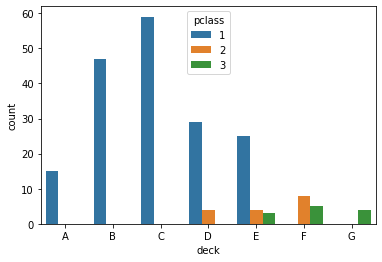

In [10]:
sns.countplot(data=titanic, x='deck', hue='pclass')

In [ ]:
# Logic điền: 1class = C, 2class = F, 3class = F

In [11]:
deck_dict = {
    1: 'C',
    2: 'F',
    3: 'F'
}
ser = titanic['pclass'].map(deck_dict) # pandas series mới, chưa gán đè lên dữ liệu cũ
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [17]:
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
new_deck.isnull().sum()

0

In [18]:
titanic['deck'] = new_deck

In [ ]:
# Fillna for deck: một cách khác

In [19]:
titanic['deck'].value_counts(dropna=False)

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

ValueError: ignored

In [20]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck']

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [21]:
titanic['deck'].fillna('Unknown')

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [22]:
titanic['deck'] = titanic['deck'].fillna('Unknown')

In [23]:
titanic['deck'].isnull().sum()

0

### Thuyết âm mưu 02: Embark Town

In [24]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [25]:
filter1 = titanic['embark_town'].isnull() # lọc các bản ghi bị thiếu dữ liệu embark_town
titanic[filter1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [26]:
titanic['embark_town'].fillna('Unknown') # No brainer (ít quan sát bị thiếu)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [68]:
filter1 = (titanic['who'] == 'woman') 
filter2 = (titanic['class'] == 'First')
# filter3 = (titanic['fare'] == 80)
ser = titanic[filter1 & filter2]
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,female_from_2nd_class
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,"(45, 60]",True
31,1,1,female,33.355556,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,"(25, 35]",True
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False,"(45, 60]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,C,Southampton,yes,False,"(35, 45]",True
862,1,1,female,48.000000,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True,"(45, 60]",True
871,1,1,female,47.000000,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,"(45, 60]",True
879,1,1,female,56.000000,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,"(45, 60]",True


KeyError: 'embark_town'

KeyError: 'embark_town'

### Thuyết âm mưu 03: Điền tuổi

In [28]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [29]:
titanic['age'].isnull().sum() / len(titanic['age'])

0.19865319865319866

<AxesSubplot:xlabel='age', ylabel='Count'>

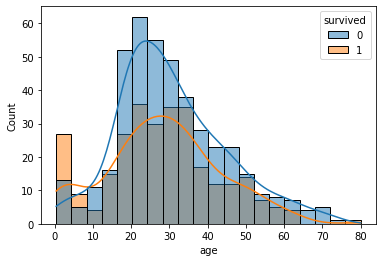

In [30]:
sns.histplot(titanic, x='age', hue='survived', kde=True)
# sns.<tên của plot>(
#     <bộ dữ liệu>, 
#     x=<cột dữ liệu x>, 
#     y=<cột dữ liệu y>, 
#     hue=<cột dữ liệu để phân loại>, 
#     kde=True # để vẽ đường cong thể hiện phân phối (đường cong đẹp đẹp)
# )

<AxesSubplot:xlabel='age', ylabel='fare'>

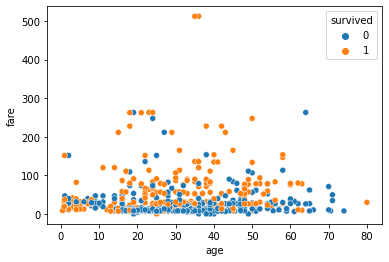

In [31]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')

In [32]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [33]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [34]:
titanic['parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='age', ylabel='parch'>

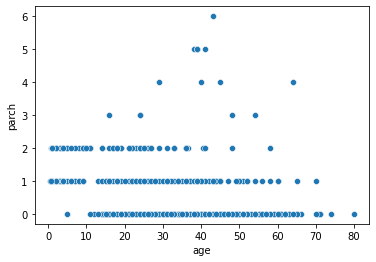

In [35]:
sns.scatterplot(data=titanic, x='age', y='parch')

<AxesSubplot:xlabel='parch', ylabel='age'>

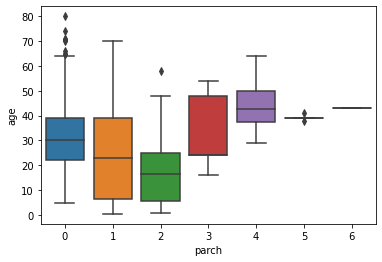

In [36]:
sns.boxplot(data=titanic, x='parch', y='age')
# Biểu đồ dạng nến:
# đường trên cùng của nên ~ 90%
# dưới cùng ~ 10%
# Trong hộp: bên trên là 75% bên dưới là 25% và ở giữa là 50% 
# Khoảng cách về giá trị giữa 25% - 75% gọi là IQR (InterQuartileRange)

In [37]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x))
# Tính tỷ lệ số lượng bản ghi bị thiếu dữ liệu cho mỗi phân loại

who    sibsp  parch
child  0      0        0.000000
              1        0.000000
              2        0.000000
       1      0        0.000000
              1        0.000000
              2        0.000000
       2      1        0.000000
              2        0.000000
       3      1        0.000000
              2        0.000000
       4      1        0.000000
              2        0.000000
       5      2        0.000000
man    0      0        0.260976
              1        0.000000
              2        0.000000
       1      0        0.118644
              1        0.095238
              2        0.200000
              3        0.000000
              4        0.000000
              5        0.000000
       2      0        0.153846
              1        0.000000
       3      1        1.000000
              2        0.000000
       4      1        0.000000
       8      2        1.000000
woman  0      0        0.214876
              1        0.055556
              2     

In [38]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])
# Lấy ra thông tin số lượng bản ghi cho mỗi nhóm
# Độ tuổi trung bình cho mỗi nhóm
# Tỷ lệ bị thiếu của mỗi nhóm

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597    0.260976
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923    0.118644
            1       21.0  36.000000    0.095238
            2        5.0  30.750000    0.200000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818    0.153846
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN    1.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN    1.000000
woman 0     0      121.0  31.084211    0.214876
            1       18.0  34.176471    0.055556
            2       15.0  26.833333    0.200000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556    0.237288
            1       21.0  35.450000    0.047619
            2        7.0  31.333333    0.142857
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000    0.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN    1.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN    1.000000

In [39]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean())) 
# điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [40]:
ser.isnull().sum()

11

In [41]:
titanic['age'] = ser

In [42]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                              
0     0      537.0  32.315390    0.000000
      1       38.0  29.647276    0.000000
      2       29.0  21.597586    0.000000
      3        1.0  24.000000    0.000000
      4        1.0  29.000000    0.000000
      5        2.0  40.000000    0.000000
1     0      123.0  32.251148    0.000000
      1       57.0  27.525439    0.000000
      2       19.0  21.579123    0.000000
      3        3.0  39.333333    0.000000
      4        3.0  49.666667    0.000000
      5        3.0  38.666667    0.000000
      6        1.0  43.000000    0.000000
2     0       16.0  31.991477    0.000000
      1        7.0   8.357143    0.000000
      2        4.0  17.250000    0.000000
      3        1.0  24.000000    0.000000
3     0        2.0  31.500000    0.000000
      1        7.0   4.333333    0.571429
      2        7.0  13.000000    0.000000
4     1        9.0   6.777778    0.000000
      2        9.0   7.333333    0.000000
5     2        5.0  10.200000    0.000000
8     2        7.0        NaN    1.000000

In [43]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [44]:
ser.isnull().sum()

7

In [45]:
titanic['age'] = ser

In [46]:
titanic['age'].isnull().sum()

7

In [47]:
child_avg_age = titanic[titanic['who'] == 'child']['age'].mean()
child_avg_age

6.369518072289157

In [48]:
titanic['age'] = titanic['age'].fillna(child_avg_age)

In [49]:
titanic['age'].isnull().sum()

0

In [ ]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

## Tạo biến mới

### Chia bin dữ liệu

<AxesSubplot:xlabel='age', ylabel='Probability'>

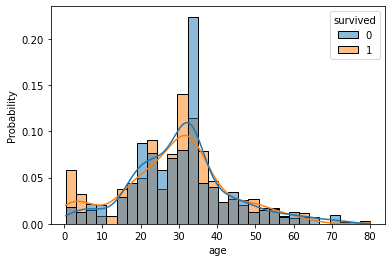

In [50]:
sns.histplot(
    data=titanic, 
    x='age', 
    hue='survived', # Chia biểu đồ thành 02 biểu đồ dạng chồng lên nhau
    kde=True, 
    stat='probability', # Tính tỷ lệ phần trăm thay vì đếm
    common_norm=False # Tính tỷ lệ cho từng phân loại thay vì tính cho chung toàn bộ dữ liệu
)

In [51]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic['age'], bins=age_groups) # Chia dữ liệu theo bước tuổi định sẵn

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [52]:
titanic['age_group'] = pd.cut(titanic['age'], bins=age_groups)
titanic['age_group']

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age_group, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [53]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]"
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,F,Southampton,no,True,"(25, 35]"
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]"
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,F,Southampton,no,False,"(25, 35]"
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 35]"


### Tạo biến chỉ báo

In [ ]:
# Thuyết âm mưu số 4:
# Có sự liên hệ giữa các quý bà và tỷ lẹ survived

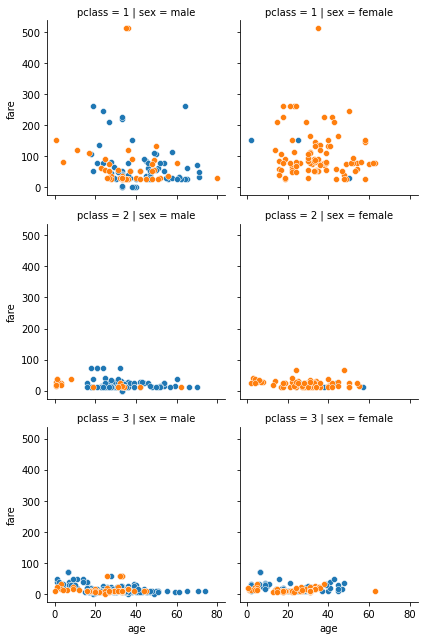

In [54]:
grid = sns.FacetGrid(
    data=titanic,
    row='pclass',
    col='sex',
    hue='survived'
)
grid.map(sns.scatterplot, 'age', 'fare')

In [55]:
filter1 = titanic['sex'] == 'female'
filter2 = titanic['pclass'] < 3
(filter1 & filter2)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [56]:
titanic['female_from_2nd_class'] = (filter1 & filter2)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,female_from_2nd_class
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,F,Southampton,no,True,"(25, 35]",False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]",True
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,F,Southampton,no,False,"(25, 35]",False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 35]",False


### Biến đổi phân phối: Tạo biến bằng Z-score

<AxesSubplot:xlabel='fare', ylabel='Count'>

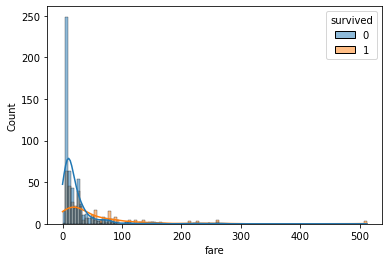

In [57]:
sns.histplot(titanic, x='fare', hue='survived', kde=True)

In [49]:
np.log(1000000000000)

27.631021115928547

In [50]:
np.log(10)

2.302585092994046

In [75]:
np.log(0) # e mũ x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [76]:
np.log(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [51]:
np.log1p(0)

0.0

In [58]:
ser = np.log1p(titanic['fare'])
ser

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

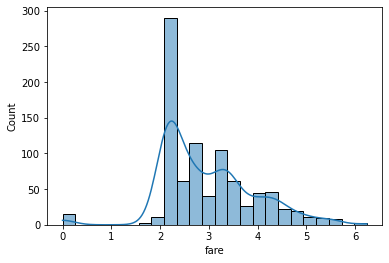

In [59]:
sns.histplot(ser, kde=True)

In [60]:
# Tính z-score
ser.mean(), ser.std()

(2.9622457416890775, 0.969048270122367)

In [61]:
new_ser = (ser - ser.mean())/ser.std()
new_ser

0     -0.879247
1      1.360456
2     -0.798092
3      1.061442
4     -0.783739
         ...   
886   -0.333511
887    0.486809
888    0.241871
889    0.486809
890   -0.818527
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

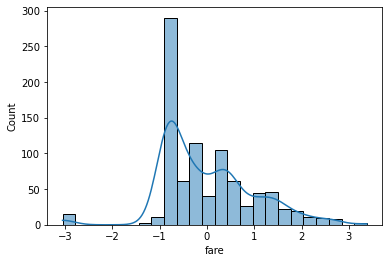

In [62]:
sns.histplot(new_ser, kde=True)

In [ ]:
# standardize --> vì tất cả phân phối chuyển về các giá trị từ -3 đến 3

In [59]:
new_ser.mean(), new_ser.std()

(3.93375318601753e-15, 1.0000000000000018)

## Mô hình chỉ có thể làm việc dạng số
- sex : chuyển thành  0 - 1 (female = 1, male = 0) : encoding gán các gí trị dạng chữ về dạng số tương ứng
- who: chuyển thành 0-1 chuyển thành các cột riêng với các số tương ứng: one- hot encoding
    - man-> man 1 woman 0 child 0
    - woman -> man 0 woman 1 child 0 
- Class: first - second - third
- age group: one- hot encoding
- Biến dạng Boolean: True =1/ False = 0

In [66]:
titanic["sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [69]:
titanic.isnull().sum()

survived                 0
pclass                   0
sex                      0
age                      0
sibsp                    0
parch                    0
fare                     0
embarked                 2
class                    0
who                      0
adult_male               0
deck                     0
embark_town              2
alive                    0
alone                    0
age_group                0
female_from_2nd_class    0
dtype: int64

In [64]:
titanic["sex"].map({"female" : 1, "male": 0})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [70]:
titanic["sex"].eq("female").astype(int) # check xem co phai female hay khong

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [74]:
titanic["deck"].value_counts().sort_index()

A           15
B           47
C          100
D           33
E           32
F          660
G            4
Unknown      0
Name: deck, dtype: int64

In [84]:
ser = titanic["deck"].map({
    "A" :"ABC",
    "B" :"ABC",
    "C" :"ABC",
    "D" :"DEFG",
    "E" :"DEFG",
    "F" :"DEFG",
    "G" :"DEFG",
    
})
ser

0      DEFG
1       ABC
2      DEFG
3       ABC
4      DEFG
       ... 
886    DEFG
887     ABC
888    DEFG
889     ABC
890    DEFG
Name: deck, Length: 891, dtype: object

In [81]:
titanic["deck"]

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [93]:
pd.get_dummies(ser)

,ABC,DEFG
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,0,1
889,1,0


In [95]:
titanic["age_group"] = titanic["age_group"].astype(str)\
    .str.strip("()[]")\
    .str.replace(",","_") # cách viết mượn của pyspark

In [102]:
dummies = pd.get_dummies(titanic[["embark_town","who","age_group"]])
dummies
# thông thường tên nhóm tuổi [15,25] khi làm tên cột thì một số thư viện sẽ không đọc được, cụ thể là XGBoost. Nên mình nên đổi tên cột không chứa ký tự đặc biệt và theo snake_case. ví dụ 15_25 

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
0,0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,1,0,0,0
887,0,0,1,0,0,1,0,1,0,0,0,0
888,0,0,1,0,0,1,0,0,1,0,0,0
889,1,0,0,0,1,0,0,0,1,0,0,0


In [107]:
for col in ["adult_male", "alone", "female_from_2nd_class"]:
    titanic_new[col] = titanic_new[col].astype(int)
titanic_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,1,0,1,0,0,1,0,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,0,0,0,1,0,0,0,1,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,1,0,0,1,0,0,1,0,0,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,...,1,0,1,0,0,0,1,0,0,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,1,0,0,1,0,1,0,0,0,0
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,0,0,1,0,0,0,1,0,0,0


In [104]:
titanic_new = titanic.join(dummies)
titanic_new
# titanic.merge(dummies, left_index = True, right_index = True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,1,0,1,0,0,1,0,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,0,0,0,1,0,0,0,1,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,1,0,0,1,0,0,1,0,0,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,...,1,0,1,0,0,0,1,0,0,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,1,0,0,1,0,1,0,0,0,0
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,0,0,1,0,0,0,1,0,0,0


In [116]:
display(
    titanic_new.info,
    titanic_new.head(10)
)

<bound method DataFrame.info of      survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  31.333333      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  ...  embark_town_Southampton who_ch

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,1,0,1,0,0,1,0,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,0,0,0,1,0,0,0,1,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,1,0,0,1,0,0,1,0,0,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,1,0,1,0,0,0,1,0,0,0
5,0,3,male,32.973597,0,0,8.4583,Q,Third,man,...,0,0,1,0,0,0,1,0,0,0
6,0,1,male,54.000000,0,0,51.8625,S,First,man,...,1,0,1,0,0,0,0,0,1,0
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,...,1,1,0,0,1,0,0,0,0,0
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,...,0,1,0,0,1,0,0,0,0,0


## Train_Test Split
- Chia dữ liệu thành phần huấn luyện và kiểm thử

In [113]:
from sklearn.model_selection import train_test_split

In [126]:
titanic_new.columns[:15]
training_data = titanic_new.drop(columns = ['sex', 
                                         'fare', 
                                         'embarked', 
                                         'class', 
                                         'who', 
                                         'deck', 
                                         'embark_town',
                                         'alive',
                                        'age_group'])

In [122]:
titanic_new.drop(columns = ['sex', 
                                         'fare', 
                                         'embarked', 
                                         'class', 
                                         'who', 
                                         'deck', 
                                         'embark_town',
                                         'alive',
                                        'age_group']).info

<bound method DataFrame.info of      survived  pclass        age  sibsp  parch  adult_male  alone  \
0           0       3  22.000000      1      0           1      0   
1           1       1  38.000000      1      0           0      0   
2           1       3  26.000000      0      0           0      1   
3           1       1  35.000000      1      0           0      0   
4           0       3  35.000000      0      0           1      1   
..        ...     ...        ...    ...    ...         ...    ...   
886         0       2  27.000000      0      0           1      1   
887         1       1  19.000000      0      0           0      1   
888         0       3  31.333333      1      2           0      0   
889         1       1  26.000000      0      0           1      1   
890         0       3  32.000000      0      0           1      1   

     female_from_2nd_class  embark_town_Cherbourg  embark_town_Queenstown  \
0                        0                      0             

In [131]:
train, test = train_test_split(training_data, random_state = 420) # mỗi lần chạy lại là xáo lại giữ liệu. Cùng random stage là kết quả giống nhau
display(
    train,
    test
)

,survived,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
254,0,3,41.000000,0,2,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
451,0,3,32.701923,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
785,0,3,25.000000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
311,1,1,18.000000,2,2,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
19,1,3,31.084211,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,1,21.000000,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0
799,0,3,30.000000,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
575,0,3,19.000000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
390,1,1,36.000000,1,2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


,survived,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
722,0,2,34.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
885,0,3,39.000000,0,5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
289,1,3,22.000000,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
131,0,3,20.000000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
615,1,2,24.000000,1,2,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,3,32.973597,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
531,0,3,32.973597,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
209,1,1,40.000000,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0
860,0,3,41.000000,2,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [134]:
X_data, Y_data = training_data.drop( columns = ["survived"]), training_data["survived"]
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, random_state = 25, test_size = 0.2)
display(
    x_train, x_test, y_train, y_test
)                                                         

,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
410,3,32.973597,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
638,3,41.000000,0,5,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
395,3,22.000000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0
221,2,27.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
800,2,34.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2,54.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
143,3,19.000000,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
474,3,22.000000,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
318,1,31.000000,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80
760,3,32.973597,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
773,3,32.973597,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
266,3,16.000000,4,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
507,1,32.973597,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
524,3,32.973597,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2,30.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
262,1,52.000000,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
393,1,23.000000,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
462,1,47.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0


410    0
638    0
395    0
221    0
800    0
      ..
317    0
143    0
474    0
318    1
132    0
Name: survived, Length: 712, dtype: int64

760    0
773    0
266    0
507    1
524    0
      ..
219    0
262    0
393    1
462    0
373    0
Name: survived, Length: 179, dtype: int64

## Linear model

In [137]:
# đọc thêm information value
from sklearn.linear_model import LogisticRegression

In [141]:
clr = LogisticRegression(
    max_iter = 1000 # giá trị mặc định =100 thì báo warning không tìn được đáp án 
)
clr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [143]:
from sklearn import metrics

In [145]:
y_pred = clr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [149]:
(y_pred == y_test).sum()/len(y_test) #Tỷ lệ accuracy độ chính xác

0.8324022346368715

In [150]:
metrics.accuracy_score(y_test, y_pred)

0.8324022346368715

### Confusion metric: Ma trận nhầm lẫn

<AxesSubplot:>

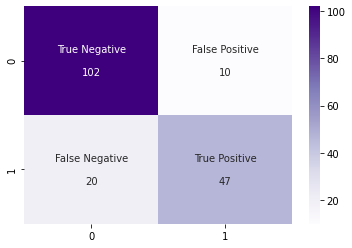

In [156]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

### confusin matrix có 4 phân loại: dự đoán và thực tế
- 11
- 10
- 01
- 00
#### Tỷ lệ Precision: trong tất cả dự đoán là 1: đoán đúng bao nhiêu
#### Ty lệ recall: trong tất cả thực tế là 1: đoán đúng bao nhiêu

In [157]:
metrics.precision_score(y_test, y_pred)

0.8245614035087719

In [158]:
metrics.recall_score(y_test, y_pred)

0.7014925373134329

In [159]:
metrics.f1_score(y_test, y_pred) # f1score trung bình điều hòa giữa 2 chỉ số precision score và recall score

0.7580645161290324

## Tree model

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
clr1 = DecisionTreeClassifier()
clr1.fit(x_train, y_train)

DecisionTreeClassifier()

In [165]:
y_pred = clr1.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [166]:
metrics.accuracy_score(y_test, y_pred)

0.8044692737430168

<AxesSubplot:>

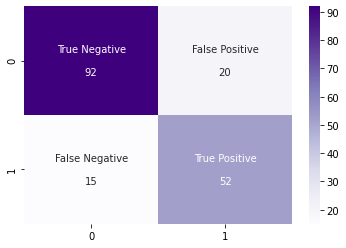

In [167]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

In [168]:
metrics.precision_score(y_test, y_pred)

0.7222222222222222

In [169]:
metrics.recall_score(y_test, y_pred)

0.7761194029850746

In [170]:
metrics.f1_score(y_test, y_pred)

0.7482014388489208

In [66]:
## Data Sampling

In [ ]:
# Tinh ti le survived

In [ ]:
# Random sampling

In [ ]:
# Sampling vs Bootstrap

In [84]:
# Sampling bang scikit learn

In [ ]:
# 2**2 = 4 --> log2(4) = 2 --> log lấy ra số mũ
# log e -> e là hằn số ~ 2.718
# e**x = ??? --> ln(???) = x
# log(1000*(10**9)) ~ 27 --> e**27 = 1000 tỷ
# e**2.7 ~ 10